In [1]:
import pandas as pd
data = pd.read_csv('weatherAUS.csv',encoding = 'utf-8')


In [2]:
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [3]:
data=data[pd.isnull(data['RainTomorrow'])==False]

In [4]:
data=data.fillna(data.mean())

<ipython-input-4-2fdd91382263>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data=data.fillna(data.mean())


In [5]:
!pip install pybbn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pybbn: filename=pybbn-3.2.3-py3-none-any.whl size=40391 sha256=a6b9774ecd17e43b3e67aba708708626b7d9fb4608329c4805f18eee3f6befd0
  Stored in directory: /root/.cache/pip/wheels/52/aa/29/604a0a26abba1522c308e6bae4a61f3b29f85240b50843d604
Successfully built pybbn


In [6]:
import pandas as pd # for data manipulation 
import networkx as nx # for drawing graphs
import matplotlib.pyplot as plt # for drawing graphs

# for creating Bayesian Belief Networks (BBN)
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [7]:
data['Temp9amCat'] = data['Temp9am'].apply(lambda x: 'cat1' if x <15 else 'cat2' if 15<=x<=26 else 'cat3')
data['Temp3pmCat'] = data['Temp3pm'].apply(lambda x: 'cat1' if x <24 else 'cat2' if 24<=x<=36 else 'cat3' )
data['WindSpeed9amCat'] = data['WindSpeed9am'].apply(lambda x: 'cat1' if x>16 else 'cat2')
data['WindSpeed3pmCat'] = data['WindSpeed3pm'].apply(lambda x: 'cat1' if x>15 else 'cat2')

In [8]:
data['Temp9amCat'].value_counts(normalize=True).sort_index()
data['Temp3pmCat'].value_counts(normalize=True).sort_index()
data['WindSpeed9amCat'].value_counts(normalize=True).sort_index()
data['WindSpeed3pmCat'].value_counts(normalize=True).sort_index()

cat1    0.599572
cat2    0.400428
Name: WindSpeed3pmCat, dtype: float64

In [9]:
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6     5.469824   
1       2008-12-02   Albury      7.4     25.1       0.0     5.469824   
2       2008-12-03   Albury     12.9     25.7       0.0     5.469824   
3       2008-12-04   Albury      9.2     28.0       0.0     5.469824   
4       2008-12-05   Albury     17.5     32.3       1.0     5.469824   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0     5.469824   
145455  2017-06-21    Uluru      2.8     23.4       0.0     5.469824   
145456  2017-06-22    Uluru      3.6     25.3       0.0     5.469824   
145457  2017-06-23    Uluru      5.4     26.9       0.0     5.469824   
145458  2017-06-24    Uluru      7.8     27.0       0.0     5.469824   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  Cloud9am  \
0       7.624853           W           44.0          W  ...  8.000000   
1       7.624853         WNW           44.0        NNW  ...  4.437189   
2       7.624853         WSW           46.0          W  ...  4.437189   
3       7.624853          NE           24.0         SE  ...  4.437189   
4       7.624853           W           41.0        ENE  ...  7.000000   
...          ...         ...            ...        ...  ...       ...   
145454  7.624853           E           31.0        ESE  ...  4.437189   
145455  7.624853           E           31.0         SE  ...  4.437189   
145456  7.624853         NNW           22.0         SE  ...  4.437189   
145457  7.624853           N           37.0         SE  ...  4.437189   
145458  7.624853          SE           28.0        SSE  ...  3.000000   

        Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Temp9amCat  \
0       4.503167     16.9     21.8         No            No        cat2   
1       4.503167     17.2     24.3         No            No        cat2   
2       2.000000     21.0     23.2         No            No        cat2   
3       4.503167     18.1     26.5         No            No        cat2   
4       8.000000     17.8     29.7         No            No        cat2   
...          ...      ...      ...        ...           ...         ...   
145454  4.503167      9.4     20.9         No            No        cat1   
145455  4.503167     10.1     22.4         No            No        cat1   
145456  4.503167     10.9     24.5         No            No        cat1   
145457  4.503167     12.5     26.1         No            No        cat1   
145458  2.000000     15.1     26.0         No            No        cat2   

        Temp3pmCat  WindSpeed9amCat  WindSpeed3pmCat  
0             cat1             cat1             cat1  
1             cat2             cat2             cat1  
2             cat1             cat1             cat1  
3             cat2             cat2             cat2  
4             cat2             cat2             cat1  
...            ...              ...              ...  
145454        cat1             cat2             cat2  
145455        cat1             cat2             cat2  
145456        cat2             cat2             cat2  
145457        cat2             cat2             cat2  
145458        cat2             cat2             cat2  

[142193 rows x 27 columns]

In [10]:
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob  

In [16]:
Temp9am = BbnNode(Variable(0,'Temp9am',['cat1','cat2','cat3']),probs(data,child = 'Temp9amCat'))
Temp3pm = BbnNode(Variable(1,'Temp3pm',['cat1','cat2','cat3']),probs(data,parent1 = 'Temp9amCat',child = 'Temp3pmCat'))
WindSpeed9am = BbnNode(Variable(2,'WindSpeed9am',['cat1','cat2']),probs(data,child = 'WindSpeed9amCat'))
WindSpeed3pm = BbnNode(Variable(3,'WindSpeed3pm',['cat1','cat2']),probs(data,parent1 = 'WindSpeed9amCat',child = 'WindSpeed3pm'))
RainTomorrow = BbnNode(Variable(4,'RainTomorrow',['No','Yes']),probs(data,child='RainTomorrow',parent1 = 'Temp3pmCat', parent2 = 'WindSpeed3pmCat' ))

In [17]:
bbn = Bbn() \
    .add_node(Temp9am) \
    .add_node(Temp3pm) \
    .add_node(WindSpeed9am) \
    .add_node(WindSpeed3pm) \
    .add_node(RainTomorrow) \
    .add_edge(Edge(Temp9am, Temp3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(WindSpeed9am, WindSpeed3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(WindSpeed3pm, RainTomorrow, EdgeType.DIRECTED))\
    .add_edge(Edge(Temp3pm, RainTomorrow, EdgeType.DIRECTED))

In [18]:
join_tree = InferenceController.apply(bbn)

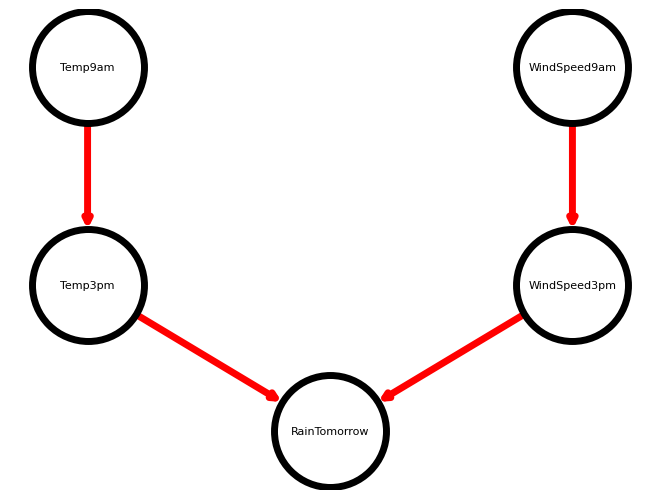

In [19]:
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 2), 3: (1, 0.5), 4:(0,-0.5)}

# Set options for graph looks
options = {
    "font_size": 8,
    "node_size": 6500,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,}
    
# Generate graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

In [21]:
# Define a function for printing marginal probabilities
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('\n\n')
        
# Use the above function to print marginal probabilities
print_probs()

Node: 3|WindSpeed3pm|cat1,cat2
Values:
3=cat1|0.27277
3=cat2|0.72723



Node: 2|WindSpeed9am|cat1,cat2
Values:
2=cat1|0.11260
2=cat2|0.88740



Node: 1|Temp3pm|cat1,cat2,cat3
Values:
1=cat1|0.64886
1=cat2|0.32668
1=cat3|0.02447



Node: 0|Temp9am|cat1,cat2,cat3
Values:
0=cat1|0.39733
0=cat2|0.50787
0=cat3|0.09480



Node: 4|RainTomorrow|No,Yes
Values:
4=No|0.84036
4=Yes|0.15964





In [23]:
# To add evidence of events that happened so probability distribution can be recalculated
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
# Use above function to add evidence
evidence('ev1', 'Temp9am', 'cat3', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|WindSpeed3pm|cat1,cat2
Values:
3=cat1|0.27277
3=cat2|0.72723



Node: 2|WindSpeed9am|cat1,cat2
Values:
2=cat1|0.11260
2=cat2|0.88740



Node: 1|Temp3pm|cat1,cat2,cat3
Values:
1=cat1|0.05267
1=cat2|0.74013
1=cat3|0.20720



Node: 0|Temp9am|cat1,cat2,cat3
Values:
0=cat1|0.00000
0=cat2|0.00000
0=cat3|1.00000



Node: 4|RainTomorrow|No,Yes
Values:
4=No|0.88086
4=Yes|0.11914





will not rain as probability of no is greater than 0.5

In [24]:
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
# Add more evidence
evidence('ev2', 'Temp9am', 'cat1', 1.0)
# Print marginal probabilities
print_probs()

Node: 3|WindSpeed3pm|cat1,cat2
Values:
3=cat1|0.27277
3=cat2|0.72723



Node: 2|WindSpeed9am|cat1,cat2
Values:
2=cat1|0.11260
2=cat2|0.88740



Node: 1|Temp3pm|cat1,cat2,cat3
Values:
1=cat1|0.97522
1=cat2|0.02476
1=cat3|0.00002



Node: 0|Temp9am|cat1,cat2,cat3
Values:
0=cat1|1.00000
0=cat2|0.00000
0=cat3|0.00000



Node: 4|RainTomorrow|No,Yes
Values:
4=No|0.82005
4=Yes|0.17995





will not rain as probability of no is greater than 0.5

In [25]:
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
evidence('ev3', 'Temp3pm', 'cat2', 1.0)
print_probs()


Node: 3|WindSpeed3pm|cat1,cat2
Values:
3=cat1|0.27277
3=cat2|0.72723



Node: 2|WindSpeed9am|cat1,cat2
Values:
2=cat1|0.11260
2=cat2|0.88740



Node: 1|Temp3pm|cat1,cat2,cat3
Values:
1=cat1|0.00000
1=cat2|1.00000
1=cat3|0.00000



Node: 0|Temp9am|cat1,cat2,cat3
Values:
0=cat1|1.00000
0=cat2|0.00000
0=cat3|0.00000



Node: 4|RainTomorrow|No,Yes
Values:
4=No|0.87897
4=Yes|0.12103





will not rain as probability of no is greater than 0.5

In [26]:
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
evidence('ev4', 'Temp3pm', 'cat1', 1.0)
print_probs()


Node: 3|WindSpeed3pm|cat1,cat2
Values:
3=cat1|0.27277
3=cat2|0.72723



Node: 2|WindSpeed9am|cat1,cat2
Values:
2=cat1|0.11260
2=cat2|0.88740



Node: 1|Temp3pm|cat1,cat2,cat3
Values:
1=cat1|1.00000
1=cat2|0.00000
1=cat3|0.00000



Node: 0|Temp9am|cat1,cat2,cat3
Values:
0=cat1|1.00000
0=cat2|0.00000
0=cat3|0.00000



Node: 4|RainTomorrow|No,Yes
Values:
4=No|0.81855
4=Yes|0.18145





will not rain as probability of no is greater than 0.5

In [27]:
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
evidence('ev5', 'WindSpeed9am', 'cat1', 1.0)
print_probs()


Node: 3|WindSpeed3pm|cat1,cat2
Values:
3=cat1|0.36364
3=cat2|0.63636



Node: 2|WindSpeed9am|cat1,cat2
Values:
2=cat1|1.00000
2=cat2|0.00000



Node: 1|Temp3pm|cat1,cat2,cat3
Values:
1=cat1|1.00000
1=cat2|0.00000
1=cat3|0.00000



Node: 0|Temp9am|cat1,cat2,cat3
Values:
0=cat1|1.00000
0=cat2|0.00000
0=cat3|0.00000



Node: 4|RainTomorrow|No,Yes
Values:
4=No|0.80483
4=Yes|0.19517





will not rain as probability of no is greater than 0.5

In [28]:
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
evidence('ev6', 'WindSpeed3pm', 'cat2', 1.0)
print_probs()


Node: 3|WindSpeed3pm|cat1,cat2
Values:
3=cat1|0.00000
3=cat2|1.00000



Node: 2|WindSpeed9am|cat1,cat2
Values:
2=cat1|1.00000
2=cat2|0.00000



Node: 1|Temp3pm|cat1,cat2,cat3
Values:
1=cat1|1.00000
1=cat2|0.00000
1=cat3|0.00000



Node: 0|Temp9am|cat1,cat2,cat3
Values:
0=cat1|1.00000
0=cat2|0.00000
0=cat3|0.00000



Node: 4|RainTomorrow|No,Yes
Values:
4=No|0.85973
4=Yes|0.14027





will not rain as probability of no is greater than 0.5